# Linear Regression - Baseline Model

This is a simple implementation of a Linear Regression Model in order to serve as a baseline/benchmark performance for the project.

## Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
pd.options.display.float_format = '{:.4f}'.format
rc={'savefig.dpi': 75, 'figure.autolayout': False, 'figure.figsize': [12, 8], 'axes.labelsize': 18,\
   'axes.titlesize': 18, 'font.size': 18, 'lines.linewidth': 2.0, 'lines.markersize': 8, 'legend.fontsize': 16,\
   'xtick.labelsize': 16, 'ytick.labelsize': 16}

sns.set(style='dark',rc=rc)

pd.options.display.max_rows = 400
pd.options.display.max_seq_items = 200

default_color = '#56B4E9'
colormap = plt.cm.cool

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold, cross_validate

# Loading Data

In [3]:
df_1_all = pd.read_csv('Cleaned Data/df_1_all_reg.csv')
df_2_all = pd.read_csv('Cleaned Data/df_2_all_reg.csv')
df_3_all = pd.read_csv('Cleaned Data/df_3_all_reg.csv')
df_4_all = pd.read_csv('Cleaned Data/df_4_all_reg.csv')
df_5_all = pd.read_csv('Cleaned Data/df_5_all_reg.csv')
df_6_all = pd.read_csv('Cleaned Data/df_6_all_reg.csv')

In [4]:
df_1_2017 = pd.read_csv('Cleaned Data/df_1_2017_reg.csv')
df_2_2017 = pd.read_csv('Cleaned Data/df_2_2017_reg.csv')
df_3_2017 = pd.read_csv('Cleaned Data/df_3_2017_reg.csv')
df_4_2017 = pd.read_csv('Cleaned Data/df_4_2017_reg.csv')
df_5_2017 = pd.read_csv('Cleaned Data/df_5_2017_reg.csv')
df_6_2017 = pd.read_csv('Cleaned Data/df_6_2017_reg.csv')

## Utilitary Functions and Variables

In [5]:
'''
Cross Validation Function
Takes in training set features and target, the model, and number of splits for K-Fold, returns the mean of 
the K scores.

'''
def cross_val(X, y, model):
    kfold = KFold(n_splits=5, random_state=seed, shuffle = True)
    results = cross_validate(model, X, y, cv=kfold, scoring=scoring)
    print('MAE: %.4f (%.4f)' % (results['test_MAE'].mean()*-1, results['test_MAE'].std()))
    print('MSE: %.4f (%.4f)' % (results['test_MSE'].mean()*-1, results['test_MSE'].std()))
    print('-----------------------------------------')

In [6]:
'''
Plot Figure Helper Function
Takes in the predicted scores and original target scores and returns a graph.

'''
def plot_figure(scores, pred):
    plt.figure(figsize=(16,6))
    plt.plot(range(scores.shape[0]), scores, color='royalblue', alpha=.8, label='True')
    plt.plot(range(pred.shape[0]), pred, color='tomato', alpha=.8, label='Predicted')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.title("Predicted vs True Values")
    plt.xlabel("Entries")
    plt.ylabel("Points")

In [7]:
'''
Show Predictions Function
Takes in the model, training set features and target, and the original dataframe, returns a graph with the 
predicted values as compared to the original target values.

'''
def show_preds(estimator, X, y, df):
    pred = estimator.predict(X)
    df['predictions'] = pred
    plot_figure(y, pred)
    #return df[['Athlete_Name', 'Pontos', 'predictions', 'Preco', 'Round']].sort_values(by=['predictions'], ascending=False)

In [8]:
'''
Prediction Function
Takes in Dataframe, Model, Model Parameters, number of players per position, and returns a list with 
the following features: Athlete ID, Position ID, Points, Round, Predicted Scores, Price, and Price Variation
for the chosen athletes.

'''
def get_preds(df, model, model_params, count):
    lst = []
    for rodada in list_rounds:
        df_rodada = df[df.Round == rodada]
        df_rodada['predictions'] = model.predict(df_rodada[model_params])
        df_sorted = df_rodada.sort_values(by=['predictions'], ascending=False).head(count)
        for i in range(count):
            lst.append([df_sorted.AthleteID.values[i], df_sorted.PositionID.values[i], 
                        df_sorted.Points.values[i], rodada, df_sorted.predictions.values[i],
                        df_sorted.Price.values[i], df_sorted.Price_Variation.values[i]])
    return lst

In [9]:
'''
Define Model Function
Takes the model and passes it through a preprocessing pipeline step for normalization.

'''
def def_model(model):
    # create pipeline
    estimators = []
    estimators.append(('scaler', StandardScaler()))
    estimators.append(('linear', model))
    model_ = Pipeline(estimators)
    
    return model_

In [10]:
seed = 42
np.random.seed(seed)

In [11]:
# Scoring Functions for the Regressor
scoring = {'MAE': 'neg_mean_absolute_error',
           'MSE': 'neg_mean_squared_error'}

In [15]:
base_params = ['Away', 'avg_Assists',
       'avg_Difficult_Saves', 'avg_Fouls_Conceded', 'avg_Fouls_Received',
       'avg_Game_Without_Being_Scored', 'avg_Goals', 'avg_Goals_Conceded',
       'avg_Missed_Passes', 'avg_Missed_Penalty', 'avg_Offsides',
       'avg_Own_Goals', 'avg_Penalty_Saves', 'avg_Points', 'avg_Price',
       'avg_Red_Card', 'avg_Shot_Missed', 'avg_Shot_Saved',
       'avg_Shot_on_Post', 'avg_Stolen_Balls', 'avg_Yellow_Card',
               
       'avg_team_avg_1_Difficult_Saves', 'avg_team_avg_1_Points',
       'avg_team_avg_1_Assists', 'avg_team_avg_1_Fouls_Conceded',
       'avg_team_avg_1_Fouls_Received',
       'avg_team_avg_1_Game_Without_Being_Scored',
       'avg_team_avg_1_Goals_Conceded', 'avg_team_avg_1_Missed_Passes',
       'avg_team_avg_1_Penalty_Saves', 'avg_team_avg_1_Price',
       'avg_team_avg_1_Red_Card', 'avg_team_avg_1_Shot_Saved',
       'avg_team_avg_1_Stolen_Balls', 'avg_team_avg_1_Yellow_Card',
               
       'avg_team_avg_2_Assists', 'avg_team_avg_2_Fouls_Conceded',
       'avg_team_avg_2_Fouls_Received',
       'avg_team_avg_2_Game_Without_Being_Scored', 'avg_team_avg_2_Goals',
       'avg_team_avg_2_Missed_Passes', 'avg_team_avg_2_Missed_Penalty',
       'avg_team_avg_2_Offsides', 'avg_team_avg_2_Own_Goals',
       'avg_team_avg_2_Price', 'avg_team_avg_2_Points',
       'avg_team_avg_2_Red_Card', 'avg_team_avg_2_Shot_Missed',
       'avg_team_avg_2_Shot_Saved', 'avg_team_avg_2_Shot_on_Post',
       'avg_team_avg_2_Stolen_Balls', 'avg_team_avg_2_Yellow_Card',
               
       'avg_team_avg_3_Assists', 'avg_team_avg_3_Fouls_Conceded',
       'avg_team_avg_3_Fouls_Received',
       'avg_team_avg_3_Game_Without_Being_Scored', 'avg_team_avg_3_Goals',
       'avg_team_avg_3_Missed_Passes', 'avg_team_avg_3_Missed_Penalty',
       'avg_team_avg_3_Offsides', 'avg_team_avg_3_Own_Goals',
       'avg_team_avg_3_Points', 'avg_team_avg_3_Price',
       'avg_team_avg_3_Red_Card', 'avg_team_avg_3_Shot_Missed',
       'avg_team_avg_3_Shot_Saved', 'avg_team_avg_3_Shot_on_Post',
       'avg_team_avg_3_Stolen_Balls', 'avg_team_avg_3_Yellow_Card',
               
       'avg_team_avg_4_Assists', 'avg_team_avg_4_Fouls_Conceded',
       'avg_team_avg_4_Fouls_Received',
       'avg_team_avg_4_Game_Without_Being_Scored', 'avg_team_avg_4_Goals',
       'avg_team_avg_4_Missed_Passes', 'avg_team_avg_4_Missed_Penalty',
       'avg_team_avg_4_Offsides', 'avg_team_avg_4_Own_Goals',
       'avg_team_avg_4_Points', 'avg_team_avg_4_Price',
       'avg_team_avg_4_Red_Card', 'avg_team_avg_4_Shot_Missed',
       'avg_team_avg_4_Shot_Saved', 'avg_team_avg_4_Shot_on_Post',
       'avg_team_avg_4_Stolen_Balls', 'avg_team_avg_4_Yellow_Card',
               
       'avg_team_avg_5_Assists', 'avg_team_avg_5_Fouls_Conceded',
       'avg_team_avg_5_Fouls_Received',
       'avg_team_avg_5_Game_Without_Being_Scored', 'avg_team_avg_5_Goals',
       'avg_team_avg_5_Missed_Passes', 'avg_team_avg_5_Missed_Penalty',
       'avg_team_avg_5_Offsides', 'avg_team_avg_5_Own_Goals',
       'avg_team_avg_5_Points', 'avg_team_avg_5_Price',
       'avg_team_avg_5_Red_Card', 'avg_team_avg_5_Shot_Missed',
       'avg_team_avg_5_Shot_Saved', 'avg_team_avg_5_Shot_on_Post',
       'avg_team_avg_5_Stolen_Balls', 'avg_team_avg_5_Yellow_Card',
               
       'avg_team_avg_6_Points', 'avg_team_avg_6_Price',
               
       'opp_avg_team_avg_1_Difficult_Saves', 'opp_avg_team_avg_1_Points',
       'opp_avg_team_avg_1_Assists', 'opp_avg_team_avg_1_Fouls_Conceded',
       'opp_avg_team_avg_1_Fouls_Received',
       'opp_avg_team_avg_1_Game_Without_Being_Scored',
       'opp_avg_team_avg_1_Goals_Conceded',
       'opp_avg_team_avg_1_Missed_Passes',
       'opp_avg_team_avg_1_Penalty_Saves', 'opp_avg_team_avg_1_Price',
       'opp_avg_team_avg_1_Red_Card', 'opp_avg_team_avg_1_Shot_Saved',
       'opp_avg_team_avg_1_Stolen_Balls',
       'opp_avg_team_avg_1_Yellow_Card',
               
               'opp_avg_team_avg_2_Assists',
       'opp_avg_team_avg_2_Fouls_Conceded',
       'opp_avg_team_avg_2_Fouls_Received',
       'opp_avg_team_avg_2_Game_Without_Being_Scored',
       'opp_avg_team_avg_2_Goals', 'opp_avg_team_avg_2_Missed_Passes',
       'opp_avg_team_avg_2_Missed_Penalty', 'opp_avg_team_avg_2_Offsides',
       'opp_avg_team_avg_2_Own_Goals', 'opp_avg_team_avg_2_Price',
       'opp_avg_team_avg_2_Points', 'opp_avg_team_avg_2_Red_Card',
       'opp_avg_team_avg_2_Shot_Missed', 'opp_avg_team_avg_2_Shot_Saved',
       'opp_avg_team_avg_2_Shot_on_Post',
       'opp_avg_team_avg_2_Stolen_Balls',
       'opp_avg_team_avg_2_Yellow_Card', 
               
               'opp_avg_team_avg_3_Assists',
       'opp_avg_team_avg_3_Fouls_Conceded',
       'opp_avg_team_avg_3_Fouls_Received',
       'opp_avg_team_avg_3_Game_Without_Being_Scored',
       'opp_avg_team_avg_3_Goals', 'opp_avg_team_avg_3_Missed_Passes',
       'opp_avg_team_avg_3_Missed_Penalty', 'opp_avg_team_avg_3_Offsides',
       'opp_avg_team_avg_3_Own_Goals', 'opp_avg_team_avg_3_Points',
       'opp_avg_team_avg_3_Price', 'opp_avg_team_avg_3_Red_Card',
       'opp_avg_team_avg_3_Shot_Missed', 'opp_avg_team_avg_3_Shot_Saved',
       'opp_avg_team_avg_3_Shot_on_Post',
       'opp_avg_team_avg_3_Stolen_Balls',
       'opp_avg_team_avg_3_Yellow_Card',
               
               'opp_avg_team_avg_4_Assists',
       'opp_avg_team_avg_4_Fouls_Conceded',
       'opp_avg_team_avg_4_Fouls_Received',
       'opp_avg_team_avg_4_Game_Without_Being_Scored',
       'opp_avg_team_avg_4_Goals', 'opp_avg_team_avg_4_Missed_Passes',
       'opp_avg_team_avg_4_Missed_Penalty', 'opp_avg_team_avg_4_Offsides',
       'opp_avg_team_avg_4_Own_Goals', 'opp_avg_team_avg_4_Points',
       'opp_avg_team_avg_4_Price', 'opp_avg_team_avg_4_Red_Card',
       'opp_avg_team_avg_4_Shot_Missed', 'opp_avg_team_avg_4_Shot_Saved',
       'opp_avg_team_avg_4_Shot_on_Post',
       'opp_avg_team_avg_4_Stolen_Balls',
       'opp_avg_team_avg_4_Yellow_Card', 
               
               'opp_avg_team_avg_5_Assists',
       'opp_avg_team_avg_5_Fouls_Conceded',
       'opp_avg_team_avg_5_Fouls_Received',
       'opp_avg_team_avg_5_Game_Without_Being_Scored',
       'opp_avg_team_avg_5_Goals', 'opp_avg_team_avg_5_Missed_Passes',
       'opp_avg_team_avg_5_Missed_Penalty', 'opp_avg_team_avg_5_Offsides',
       'opp_avg_team_avg_5_Own_Goals', 'opp_avg_team_avg_5_Points',
       'opp_avg_team_avg_5_Price', 'opp_avg_team_avg_5_Red_Card',
       'opp_avg_team_avg_5_Shot_Missed', 'opp_avg_team_avg_5_Shot_Saved',
       'opp_avg_team_avg_5_Shot_on_Post',
       'opp_avg_team_avg_5_Stolen_Balls',
       'opp_avg_team_avg_5_Yellow_Card', 
               
               'opp_avg_team_avg_6_Points', 'opp_avg_team_avg_6_Price'
       ]

# Implementation

**Linear Regression Model implementation for each position.**

Each implementation follows the followng steps: 
1. An initial filter of features is made in order to only keep the features that have valid values for the training and testing set.
2. The baseline model is defined via a pipeline.
3. A cross-validation of the model is done using the K-Fold split strategy, recording the corresponding MAE and MSE.
4. The model is fitted to the data.
5. A graph is drawn showing the predicted Scores as compared to the true Scores for the training set, for visualization purposes.

This process is repeated for every position.

## Position 1

For Position 1, since there is only one player for the position, I remove the values associated to the team average for the position, as they end up being a duplicate feature.

In [16]:
model_params_1 = df_1_all[base_params].mean()[df_1_all[base_params].mean() > 0.01].keys().values.tolist()

In [17]:
model_params_1 = [e for e in model_params_1 if e not in (
    'avg_team_avg_1_Difficult_Saves', 'avg_team_avg_1_Points',
       'avg_team_avg_1_Assists', 'avg_team_avg_1_Fouls_Conceded',
       'avg_team_avg_1_Fouls_Received',
       'avg_team_avg_1_Game_Without_Being_Scored', 'avg_team_avg_1_Goals',
       'avg_team_avg_1_Goals_Conceded', 'avg_team_avg_1_Missed_Passes',
       'avg_team_avg_1_Missed_Penalty', 'avg_team_avg_1_Offsides',
       'avg_team_avg_1_Own_Goals', 'avg_team_avg_1_Penalty_Saves',
       'avg_team_avg_1_Price', 'avg_team_avg_1_Red_Card',
       'avg_team_avg_1_Shot_Missed', 'avg_team_avg_1_Shot_Saved',
       'avg_team_avg_1_Shot_on_Post', 'avg_team_avg_1_Stolen_Balls',
       'avg_team_avg_1_Yellow_Card')]

In [18]:
X_1 = df_1_all[model_params_1].values
y_1 = df_1_all['Points'].values

print(X_1.shape)
print(y_1.shape)

(2015, 137)
(2015,)


In [19]:
lin_reg_1 = LinearRegression()

In [20]:
model_1 = def_model(lin_reg_1)

In [21]:
cross_val(X_1, y_1, model_1)

MAE: 4.6667 (0.1672)
MSE: 33.5829 (2.1800)
-----------------------------------------


In [22]:
model_1.fit(X_1, y_1)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

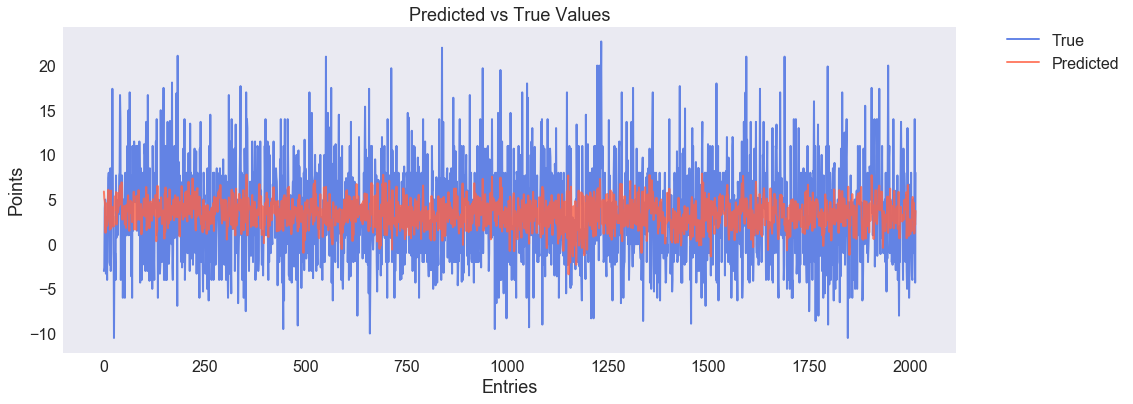

In [24]:
show_preds(model_1, X_1, y_1, df_1_all)

## Position 2

In [25]:
model_params_2 = df_2_all[base_params].mean()[df_2_all[base_params].mean() > 0.01].keys().values.tolist()

In [26]:
X_2 = df_2_all[model_params_2].values
y_2 = df_2_all['Points'].values

print(X_2.shape)
print(y_2.shape)

(4040, 149)
(4040,)


In [28]:
lin_reg_2 = LinearRegression()

In [29]:
model_2 = def_model(lin_reg_2)

In [30]:
cross_val(X_2, y_2, model_2)

MAE: 3.2614 (0.1208)
MSE: 17.1643 (1.6547)
-----------------------------------------


In [31]:
model_2.fit(X_2, y_2)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

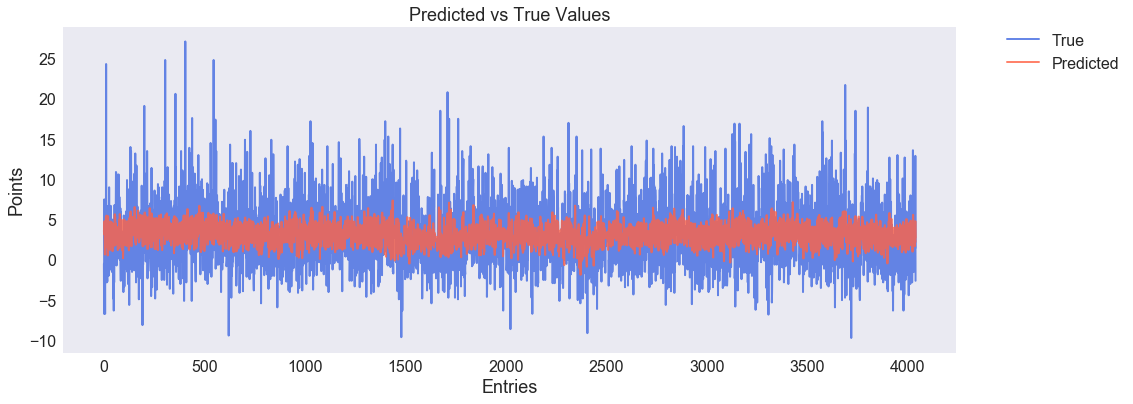

In [32]:
show_preds(model_2, X_2, y_2, df_2_all)

## Position 3

In [33]:
model_params_3 = df_3_all[base_params].mean()[df_3_all[base_params].mean() > 0.01].keys().values.tolist()

In [34]:
X_3 = df_3_all[model_params_3].values
y_3 = df_3_all['Points'].values

print(X_3.shape)
print(y_3.shape)

(4126, 149)
(4126,)


In [35]:
lin_reg_3 = LinearRegression()

In [36]:
model_3 = def_model(lin_reg_3)

In [37]:
cross_val(X_3, y_3, model_3)

MAE: 3.0713 (0.0956)
MSE: 15.2451 (0.8512)
-----------------------------------------


In [38]:
model_3.fit(X_3, y_3)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

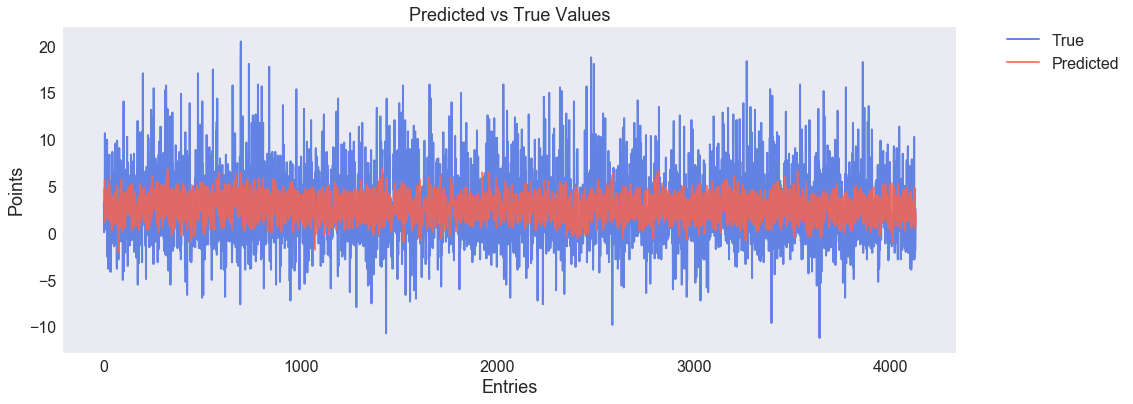

In [39]:
show_preds(model_3, X_3, y_3, df_3_all)

## Position 4

In [40]:
model_params_4 = df_4_all[base_params].mean()[df_4_all[base_params].mean() > 0.01].keys().values.tolist()

In [41]:
X_4 = df_4_all[model_params_4].values
y_4 = df_4_all['Points'].values

print(X_4.shape)
print(y_4.shape)

(9736, 150)
(9736,)


In [43]:
lin_reg_4 = LinearRegression()

In [44]:
model_4 = def_model(lin_reg_4)

In [45]:
cross_val(X_4, y_4, model_4)

MAE: 2.7932 (0.0214)
MSE: 13.9950 (0.0798)
-----------------------------------------


In [46]:
model_4.fit(X_4, y_4)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

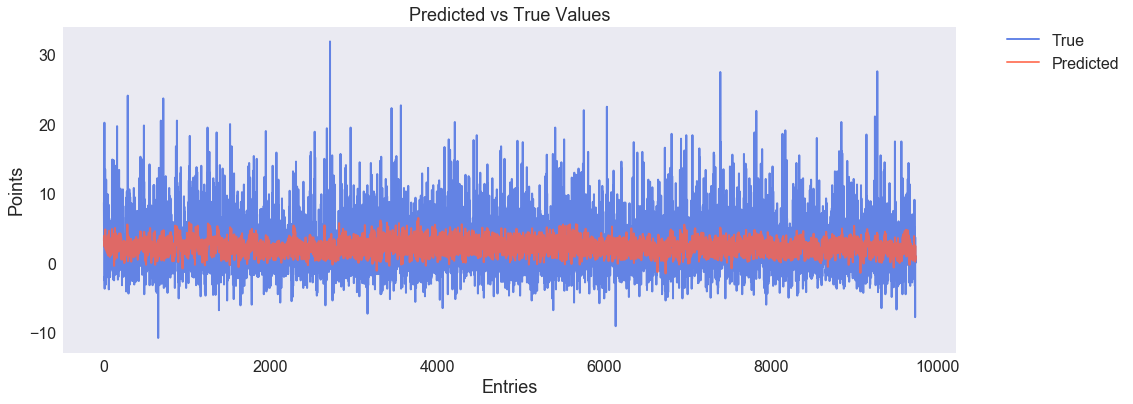

In [47]:
show_preds(model_4, X_4, y_4, df_4_all)

## Position 5

In [48]:
model_params_5 = df_5_all[base_params].mean()[df_5_all[base_params].mean() > 0.01].keys().values.tolist()

In [49]:
X_5 = df_5_all[model_params_5].values
y_5 = df_5_all['Points'].values

print(X_5.shape)
print(y_5.shape)

(6516, 150)
(6516,)


In [51]:
lin_reg_5 = LinearRegression()

In [52]:
model_5 = def_model(lin_reg_5)

In [53]:
cross_val(X_5, y_5, model_5)

MAE: 3.3341 (0.0866)
MSE: 20.2631 (1.4445)
-----------------------------------------


In [54]:
model_5.fit(X_5, y_5)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

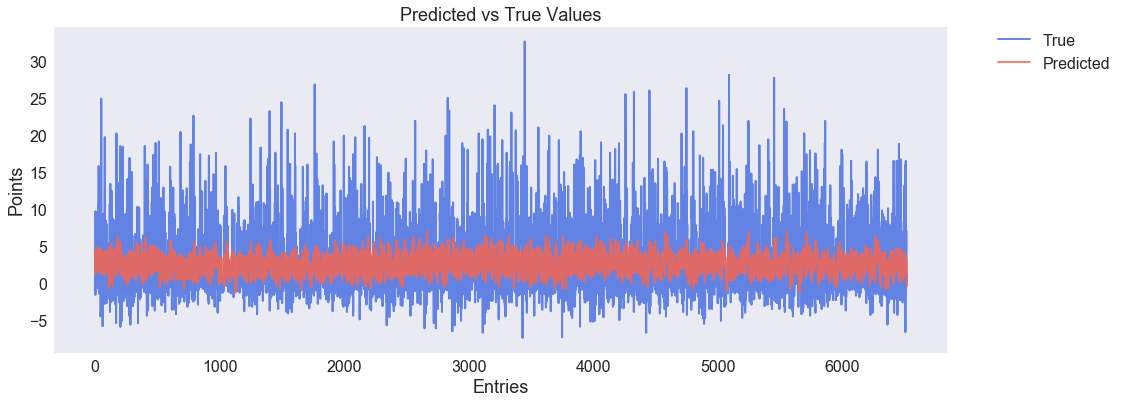

In [55]:
show_preds(model_5, X_5, y_5, df_5_all)

## Position 6

For Position 6, since there is only one player for the position, I remove the values associated to the team average for the position, as they end up being a duplicate feature.

In [56]:
model_params_6 = df_6_all[base_params].mean()[df_6_all[base_params].mean() > 0.01].keys().values.tolist()

In [57]:
model_params_6 = [e for e in model_params_6 if e not in (
    'avg_team_avg_6_Points', 'avg_team_avg_6_Price')]

In [58]:
X_6 = df_6_all[model_params_6].values
y_6 = df_6_all['Points'].values

print(X_6.shape)
print(y_6.shape)

(2022, 136)
(2022,)


In [59]:
lin_reg_6 = LinearRegression()

In [60]:
model_6 = def_model(lin_reg_6)

In [61]:
cross_val(X_6, y_6, model_6)

MAE: 1.6639 (0.0612)
MSE: 4.2747 (0.3486)
-----------------------------------------


In [62]:
model_6.fit(X_6, y_6)

Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('linear', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

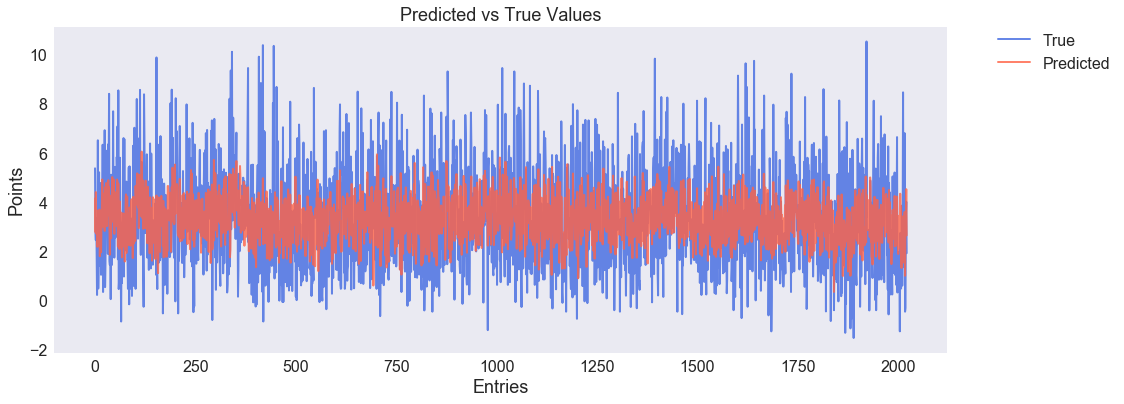

In [63]:
show_preds(model_6, X_6, y_6, df_6_all)

# 2017 Season Results

Calculation of the season average score using the best performing Models for each position.

In [64]:
# All of the available rounds for the 2017 season.
list_rounds = df_1_2017['Round'].unique()

In [65]:
# For each position, get a list (more efficient working with lists than dataframes) of the top predicted scoring
# athletes, using the established best performing models. The Team Formation is 4-4-2 with a coach (Position 6).

list1 = get_preds(df_1_2017, model_1, model_params_1, 1)
print('List 1 done.')
list2 = get_preds(df_2_2017, model_2, model_params_2, 2)
print('List 2 done.')
list3 = get_preds(df_3_2017, model_3, model_params_3, 2)
print('List 3 done.')
list4 = get_preds(df_4_2017, model_4, model_params_4, 4)
print('List 4 done.')
list5 = get_preds(df_5_2017, model_5, model_params_5, 2)
print('List 5 done.')
list6 = get_preds(df_6_2017, model_6, model_params_6, 1)
print('List 6 done.')

List 1 done.
List 2 done.
List 3 done.
List 4 done.
List 5 done.
List 6 done.


In [66]:
# Transform the lists with best choices for each position into a dataframe for easier calculations and visualizations.

columns = ['AthleteID', 'Position', 'Points', 'Round', 'Prediction', 'Price', 'Price_Variation']
df_ = pd.DataFrame(columns = columns)

list_total = []
print(len(list_total))

list_total = list1
print(len(list_total))
list_total.extend(list2)
print(len(list_total))
list_total.extend(list3)
print(len(list_total))
list_total.extend(list4)
print(len(list_total))
list_total.extend(list5)
print(len(list_total))
list_total.extend(list6)
print(len(list_total))

df_ = pd.DataFrame(list_total, columns= columns)

0
36
108
180
324
396
432


In [67]:
# Define what the cost for constructing the team was.
df_['Price_prev'] = df_['Price'] - df_['Price_Variation']

In [68]:
# Group the sum of scores per round.
df_sums = df_.groupby(['Round']).sum()

In [69]:
# Establish a Profit/Loss per round in 'Cartoletas' and what the acummulated value for these variations is per round.
df_sums['Profit'] = df_sums['Price'] - df_sums['Price_prev']
df_sums['Bank'] = df_sums['Profit'].cumsum()

The summary for each of the predicted rounds with their scores and added information.

In [70]:
df_sums

,AthleteID,Position,Points,Prediction,Price,Price_Variation,Price_prev,Profit,Bank
Round,,,,,,,,,
2,942875,43,17.7600,64.1526,119.5500,-0.3300,119.8800,-0.3300,-0.3300
3,848841,43,46.2300,58.4535,147.8900,-2.2400,150.1300,-2.2400,-2.5700
4,818646,43,24.0500,62.7332,150.2500,-5.5700,155.8200,-5.5700,-8.1400
5,863884,43,30.5500,56.5834,116.3000,-2.8400,119.1400,-2.8400,-10.9800
6,779336,43,36.6800,63.1513,129.6900,-1.6900,131.3800,-1.6900,-12.6700
8,872675,43,50.2900,61.2457,129.0100,-0.8500,129.8600,-0.8500,-13.5200
9,820195,43,83.1900,75.4245,166.6900,10.5900,156.1000,10.5900,-2.9300
10,900100,43,44.4300,75.1682,138.6400,-1.5000,140.1400,-1.5000,-4.4300
11,807687,43,78.6500,67.2891,125.3400,8.3800,116.9600,8.3800,3.9500


In [71]:
# Season 2017 Average
avg = df_sums.Points.sum()/df_sums.Points.count()
print('The 2017 Total Season Average Score was %.4f.' % (avg))

The 2017 Total Season Average Score was 46.8447.


### Average Scoring per Position

In [72]:
# Group the dataframe for each position (1-6) by their mean values.
df_mean = df_.groupby(['Position']).mean()

In [73]:
df_mean

,AthleteID,Points,Round,Prediction,Price,Price_Variation,Price_prev
Position,,,,,,,
1,58337.6111,0.6583,20.3611,6.0887,11.3064,-0.9294,12.2358
2,69152.9722,4.1167,20.3611,5.8020,8.9043,0.0986,8.8057
3,69381.5833,3.3153,20.3611,5.4860,8.4408,0.0161,8.4247
4,67197.9444,4.3590,20.3611,4.6861,13.9190,-0.0556,13.9745
5,73980.4444,4.9514,20.3611,5.3300,14.0417,-0.1197,14.1614
6,68752.8333,3.9836,20.3611,4.9493,11.6736,0.1258,11.5478


## 2017 Season MAE Results

Calculation of the MAE results for the 2017 season.

In [74]:
from sklearn.metrics import mean_absolute_error

In [75]:
'''
Simple function for calculating the MAE for the given model, parameters, and dataframe.
'''
def get_test_score(model, df, params):
    preds = model.predict(df[params].as_matrix())
    err = mean_absolute_error(df['Points'], preds)
    print(err)

In [76]:
print('2017 MAE results:')
print('----------------------')
print('Position 1:')
get_test_score(model_1, df_1_2017, model_params_1)
print('Position 2:')
get_test_score(model_2, df_2_2017, model_params_2)
print('Position 3:')
get_test_score(model_3, df_3_2017, model_params_3)
print('Position 4:')
get_test_score(model_4, df_4_2017, model_params_4)
print('Position 5:')
get_test_score(model_5, df_5_2017, model_params_5)
print('Position 6:')
get_test_score(model_6, df_6_2017, model_params_6)

2017 MAE results:
----------------------
Position 1:
4.905526396865624
Position 2:
3.363407420004106
Position 3:
3.0274145128277223
Position 4:
2.962547082663718
Position 5:
3.4895430937390457
Position 6:
1.6599805069354274
